# Financial Data
This section works with locally stored financial datasets in excel files (e.g., in the form of .xls or .xlsx). Before importing the data, some packages imports and customizations:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Import
pandas provides a number of different functions and DataFrame methods to import data stored in different formats (CSV, SQL, Excel, etc.) and to export data to different formats. The following code uses the pd.read_excel() function to import the time series data set from the excel file:

In [3]:
UKHP=pd.read_excel('https://raw.githubusercontent.com/HeyyNing/labs/main/lab1/UKHP.xls',
                   index_col=0)

In [4]:
UKHP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 1991-01-01 to 2018-03-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average House Price  327 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


You can take a first look at the data, either by inspecting or visualizing it:

In [5]:
UKHP.head()

,Average House Price
Month,
1991-01-01,53051.721106
1991-02-01,53496.798746
1991-03-01,52892.861606
1991-04-01,53677.435270
1991-05-01,54385.726747


In [6]:
UKHP.tail(3)

,Average House Price
Month,
2018-01-01,211755.925562
2018-02-01,210402.402935
2018-03-01,211625.333253


<Axes: xlabel='Month'>

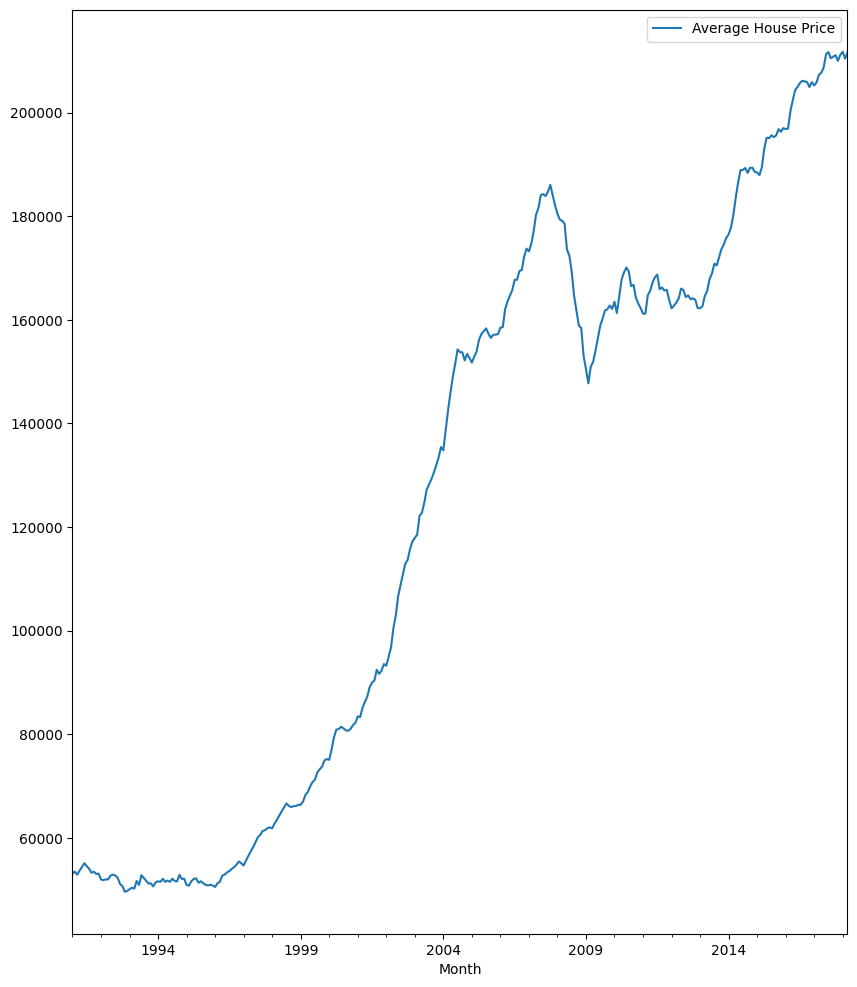

In [7]:
UKHP.plot(figsize=(10,12))

# Summary Statistics
The next step the financial analyst might take is to have a look at different summary statistics for the data set to get a “feeling” for what it is all about:

In [8]:
UKHP.describe().round(2)

,Average House Price
count,327.00
mean,124660.48
std,56387.17
min,49601.66
25%,61654.14
50%,150946.11
75%,169239.28
max,211755.93


Someone may want to calculate the above individually by using the methods:mean(), median(), quantile(),min(), std() or max():

In [9]:
UKHP.mean()

Average House Price    124660.484465
dtype: float64

In [10]:
UKHP.quantile(0.25)

Average House Price    61654.141609
Name: 0.25, dtype: float64

In [11]:
UKHP.std()

Average House Price    56387.165665
dtype: float64

UKHP.columns provides the column names of the dataframe.

In [12]:
UKHP.columns

Index(['Average House Price'], dtype='object')

You can change column names using:

In [16]:
UKHP.rename({'Average House Price': 'Avg_hp'}, axis='columns', inplace=True)

# Changing and Creating Data

Create a return series caculated as percentage changes based on the price series, and add the return series as a new column of the dataframe UKHP:

<Axes: xlabel='Month', ylabel='returns'>

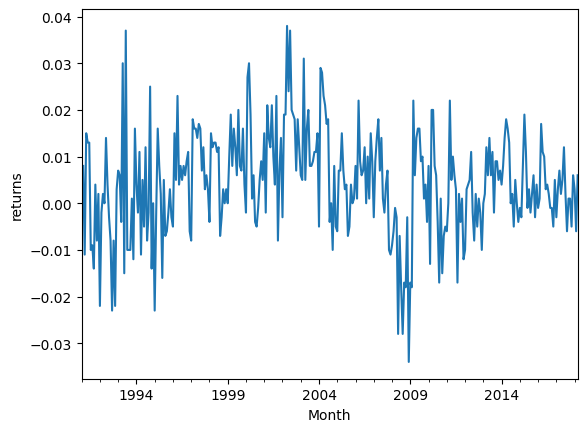

In [32]:
UKHP['ret']=UKHP['Avg_hp'].pct_change().round(3)
UKHP['ret'].plot(ylabel='returns')

Get the number of rows and columns:

In [23]:
UKHP.shape

(327, 2)

# Commonly used functions and operations
See arithmetic operators from https://www.geeksforgeeks.org/python-arithmetic-operators/

See relational Operators from https://www.geeksforgeeks.org/relational-operators-in-python/

See logical Operators from https://www.geeksforgeeks.org/python-logical-operators/

See assignment Operators from https://www.geeksforgeeks.org/assignment-operators-in-python/

# Graphics and Plots
The following example introduces a second y-axis to the plot. The left y-axis is for the column 'Avg_hp' while the right y-axis is for the column 'ret'. Consequently, there are two legends:

Text(0, 0.5, 'returns')

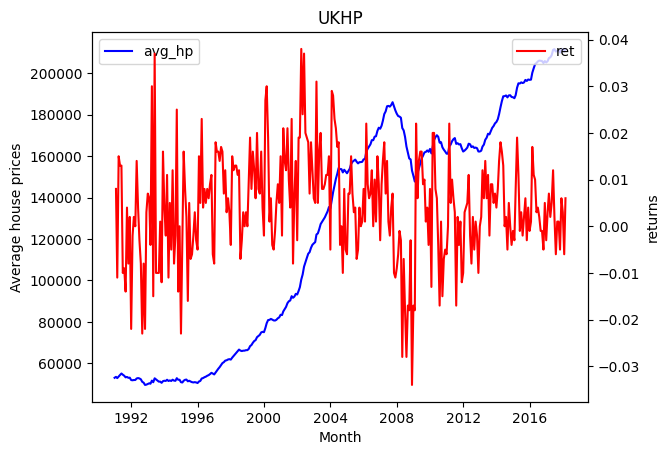

In [31]:
fig,ax1 = plt.subplots() # define the figure and axis objects
plt.plot(UKHP['Avg_hp'],'b',lw=1.5,label='avg_hp')
plt.legend(loc=0) # put legends as in the best location as possible
plt.xlabel('Month')
plt.ylabel('Average house prices')
plt.title('UKHP')
ax2 = ax1.twinx() # create a second axis object that shares the x-axis
plt.plot(UKHP['ret'],'r',lw=1.5,label='ret')
plt.legend(loc=0)
plt.ylabel('returns')

Next, we draw two separate subplots. This option gives even more freedom to handle the two data sets.

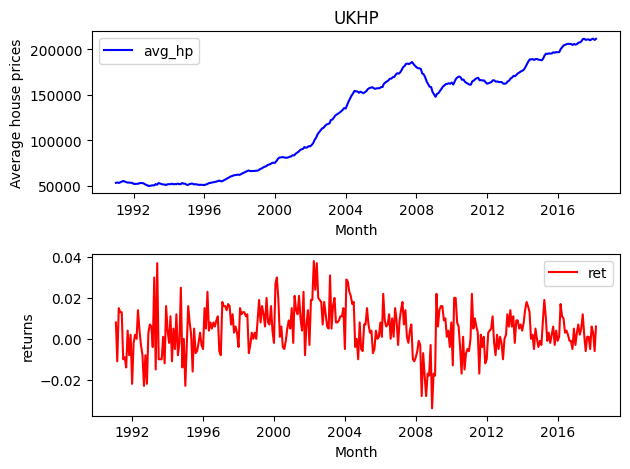

In [38]:
fig,axs = plt.subplots(2,1)
axs[0].plot(UKHP['Avg_hp'],'b',lw=1.5,label='avg_hp')
axs[0].legend(loc=0)
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average house prices')
axs[0].set_title('UKHP')

axs[1].plot(UKHP['ret'],'r',lw=1.5,label='ret')
axs[1].legend(loc=0)
axs[1].set_xlabel('Month')
axs[1].set_ylabel('returns')

fig.tight_layout()

More data visualization capabilities can be found in documentation about the matplotlib package.

# Simple linear regression estimation of an optimal hedge ratio

The example considers the situation where an investor wishes to hedge a long position in the S&P500 (or its constituent stocks) using a short position in futures contracts.

Many academic studies assume that the objective of hedging is to minimise the variance of the hedged portfolio returns.

The appropriate hedge ratio (the number of units of the futures asset to sell per unit of the spot asset held) will be the slope estimate in a regression where the dependent variable is a time series of spot returns and the independent variable is a time series of futures returns.

1. Import 'SandPhedge.xls', which contains monthly prices for the S&P500 index and S&P500 futures

In [40]:
SPhedge=pd.read_excel('https://raw.githubusercontent.com/HeyyNing/labs/main/lab1/SandPhedge.xls',
                   index_col=0)
SPhedge.info()
SPhedge.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 1997-09-01 to 2018-03-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Spot     247 non-null    float64
 1   Futures  247 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


,Spot,Futures
Date,,
1997-09-01,947.280029,954.50
1997-10-01,914.619995,924.00
1997-11-01,955.400024,955.00
1997-12-01,970.429993,979.25
1998-01-01,980.280029,987.75


2. Transform prices to log return (i.e., to produce continuously compounded returns) series.

In [54]:
SPhedge['r_spot'] = 100*np.log(SPhedge['Spot']/SPhedge['Spot'].shift(1))
SPhedge['r_futures'] = 100*np.log(SPhedge['Futures']/SPhedge['Futures'].shift(1))
SPhedge.head().round(3)

,Spot,Futures,r_spot,r_futures
Date,,,,
1997-09-01,947.28,954.50,NaN,NaN
1997-10-01,914.62,924.00,-3.509,-3.248
1997-11-01,955.40,955.00,4.362,3.300
1997-12-01,970.43,979.25,1.561,2.508
1998-01-01,980.28,987.75,1.010,0.864


In [55]:
SPhedge[['r_spot','r_futures']].describe().round(3) # summary statistics for return series

,r_spot,r_futures
count,246.000,246.000
mean,0.417,0.414
std,4.333,4.419
min,-18.564,-18.945
25%,-1.831,-1.931
50%,0.919,0.998
75%,3.276,3.134
max,10.231,10.387


3. Estimate the regression



[statsmodels](https://www.statsmodels.org/stable/index.html) is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [56]:
import statsmodels.formula.api as smf

In [62]:
formula = 'r_spot ~ r_futures'
results = smf.ols(formula, data=SPhedge[['r_spot','r_futures']]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 r_spot   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.147e+04
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          7.54e-240
Time:                        07:49:48   Log-Likelihood:                -157.16
No. Observations:                 246   AIC:                             318.3
Df Residuals:                     244   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0131      0.029      0.444      0.6

Except for coefficient estimates, i.e., α and β, the linear models also contain several other statistics which are presented next to the coefficient estimates: standard errors, the t-ratios (‘t’ column) and the p-values (‘P > |t|’).

Turning to the slope estimate for ‘r_futures’, the t-ratio is high with 146.54 suggesting that H0 : β = 0 is to be rejected. Also, the p-value for the slope coefficient is zero to, at least, three decimal places. Thus, the null hypothesis for the slope coefficient is rejected at the 1% level.

Suppose now that we wanted to test the null hypothesis that H0: β = 1 rather than H0: β = 0. We can calculate the test statistics for this hypothesis test by hand; however, it is easier if we let a function do this work. The method f_test() can do this job.

In [61]:
hypotheses = 'r_futures = 1'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=14.029809609669677, p=0.00022456631728787958, df_denom=244, df_num=1>


Output shows that the F-test statistics under ‘F’; 14.03 states the value of the F test. The corresponding p-value is 0.0002246. As it is considerably smaller than 0.01, we can reject the null hypothesis that the coefficient estimate is equal to 1 at the 1% level.